# Evaluate
We evaluate the results here

In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
mat_evaluation = pd.read_csv('results/mat_evaluation_result.csv')
stat_evaluation = pd.read_csv('results/stat_evaluation_result.csv')
bank_evaluation = pd.read_csv('results/bank_evaluation_result.csv')

mat_evaluation_no_solution = pd.read_csv('results/mat_evaluation_no_solutions_result.csv')
stat_evaluation_no_solution = pd.read_csv('results/stat_evaluation_no_solutions_result.csv')
bank_evaluation_no_solution = pd.read_csv('results/bank_evaluation_no_solutions_result.csv')

mat_evaluation_voting = pd.read_csv('results/mat_evaluation_voting_result.csv')
stat_evaluation_voting = pd.read_csv('results/stat_evaluation_voting_result.csv')
bank_evaluation_voting = pd.read_csv('results/bank_evaluation_voting_result.csv')

mat_evaluation_voting_cot = pd.read_csv('results/mat_evaluation_voting_cot_result.csv')
stat_evaluation_voting_cot = pd.read_csv('results/stat_evaluation_voting_cot_result.csv')
bank_evaluation_voting_cot = pd.read_csv('results/bank_evaluation_voting_cot_result.csv')

mat_evaluation_few_shot = pd.read_csv('results/mat_evaluation_few_shot_result.csv')
stat_evaluation_few_shot = pd.read_csv('results/stat_evaluation_few_shot_result.csv')
bank_evaluation_few_shot = pd.read_csv('results/bank_evaluation_few_shot_result.csv')

mat_evaluation_4o = pd.read_csv('results/mat_evaluation_4o_result.csv')
stat_evaluation_4o = pd.read_csv('results/stat_evaluation_4o_result.csv')
bank_evaluation_4o = pd.read_csv('results/bank_evaluation_4o_result.csv')

# Combine datasets for comparative analysis
all_data = {
    "MAT Evaluation": mat_evaluation,
    "STAT Evaluation": stat_evaluation,
    "Bank Evaluation": bank_evaluation,
    "MAT Evaluation (No Solution)": mat_evaluation_no_solution,
    "STAT Evaluation (No Solution)": stat_evaluation_no_solution,
    "Bank Evaluation (No Solution)": bank_evaluation_no_solution,
    "MAT Evaluation (Voting)": mat_evaluation_voting,
    "STAT Evaluation (Voting)": stat_evaluation_voting,
    "Bank Evaluation (Voting)": bank_evaluation_voting,
    "MAT Evaluation (Voting + CoT)": mat_evaluation_voting_cot,
    "STAT Evaluation (Voting + CoT)": stat_evaluation_voting_cot,
    "Bank Evaluation (Voting + CoT)": bank_evaluation_voting_cot,
    "MAT Evaluation (Few Shot)": mat_evaluation_few_shot,
    "STAT Evaluation (Few Shot)": stat_evaluation_few_shot,
    "Bank Evaluation (Few Shot)": bank_evaluation_few_shot,
    "MAT Evaluation (4o)": mat_evaluation_4o,
    "STAT Evaluation (4o)": stat_evaluation_4o,
    "Bank Evaluation (4o)": bank_evaluation_4o,
}


In [3]:
# calculate descriptive statistics
def descriptive_statistics(df, dataset_name):
    stats = df["accuracy"].describe()
    print(f"Descriptive statistics for {dataset_name} accuracy:")
    print(stats)
    print("\n")
    return stats


Descriptive statistics for MAT Evaluation accuracy:
count    100.000000
mean       0.687500
std        0.308497
min        0.000000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64


Descriptive statistics for STAT Evaluation accuracy:
count    100.000000
mean       0.740000
std        0.251058
min        0.500000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64


Descriptive statistics for Bank Evaluation accuracy:
count    100.000000
mean       0.721000
std        0.246827
min        0.000000
25%        0.500000
50%        0.666667
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64


Descriptive statistics for MAT Evaluation (No Solution) accuracy:
count    100.000000
mean       0.647500
std        0.233266
min        0.250000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64


Desc

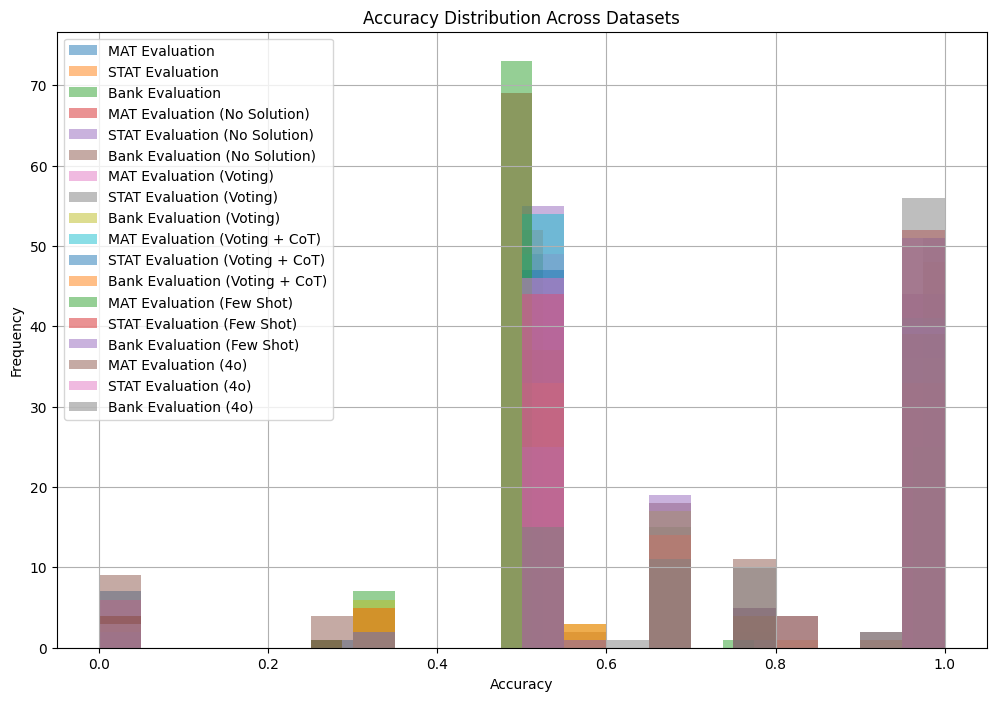

In [4]:

# Analyze accuracy across datasets
accuracy_stats = {}
for dataset_name, df in all_data.items():
    accuracy_stats[dataset_name] = descriptive_statistics(df, dataset_name)

# Visualize accuracy distribution
plt.figure(figsize=(12, 8))
for dataset_name, df in all_data.items():
    plt.hist(df["accuracy"], bins=20, alpha=0.5, label=dataset_name)
plt.title("Accuracy Distribution Across Datasets")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


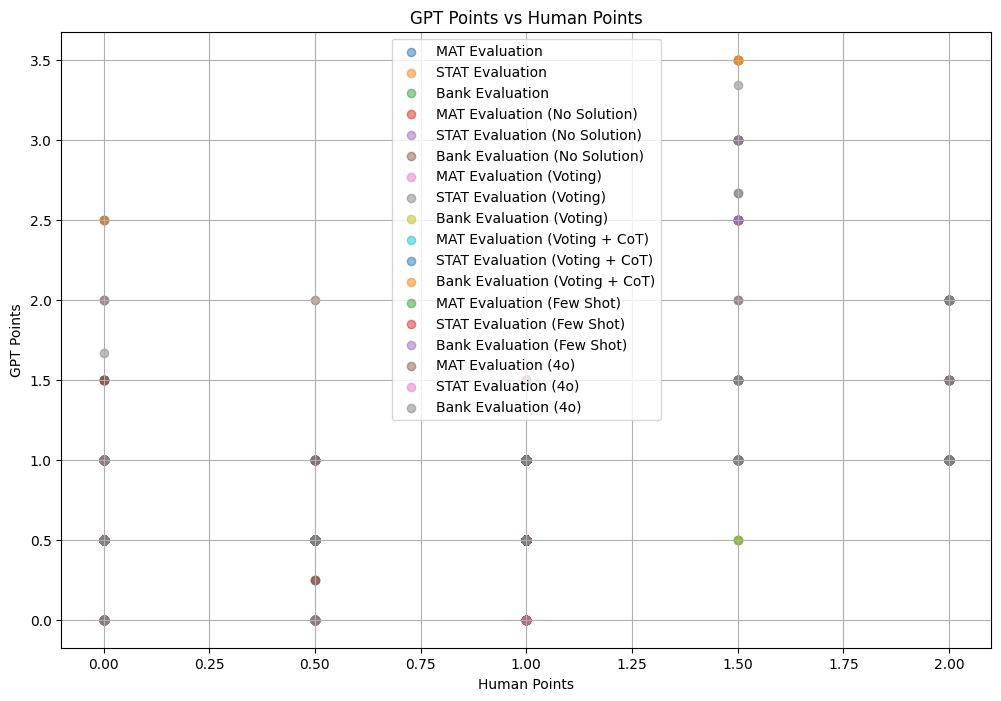

In [5]:
# Additional insights: Comparing GPT vs Human Points
plt.figure(figsize=(12, 8))
for dataset_name, df in all_data.items():
    plt.scatter(df["human_points"], df["gpt_points"], alpha=0.5, label=dataset_name)
plt.title("GPT Points vs Human Points")
plt.xlabel("Human Points")
plt.ylabel("GPT Points")
plt.legend()
plt.grid()
plt.show()


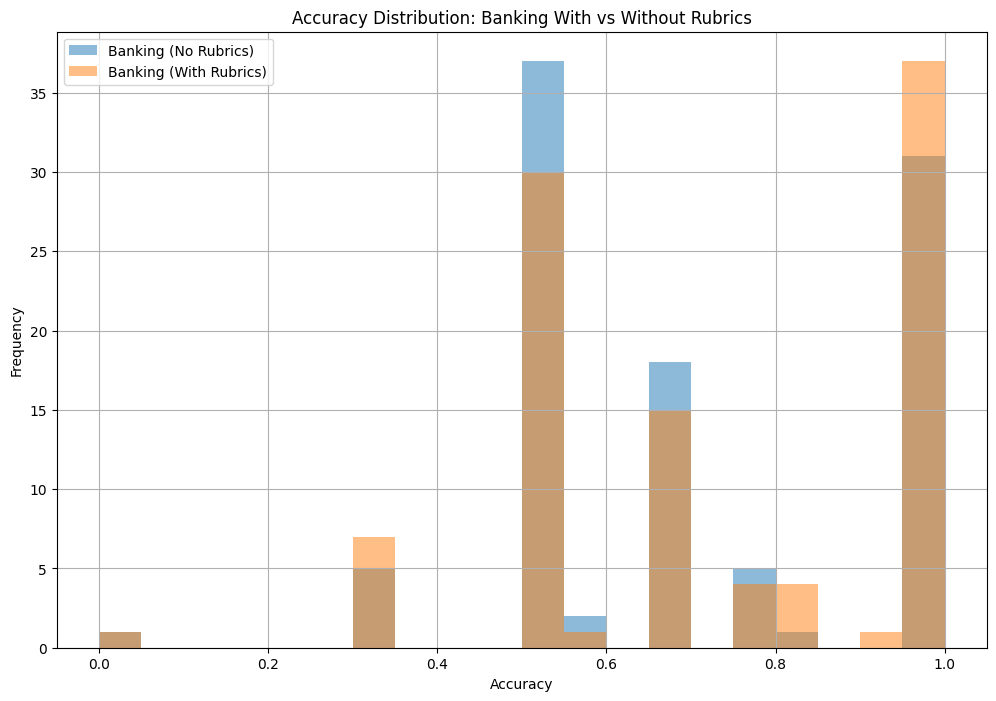

In [6]:

# Detailed analysis of Banking with and without rubrics
banking_rubrics_comparison = pd.concat([
    bank_evaluation_no_solution.assign(rubric_type="No Rubrics"),
    bank_evaluation.assign(rubric_type="With Rubrics")
])

plt.figure(figsize=(12, 8))
for rubric_type, group in banking_rubrics_comparison.groupby("rubric_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"Banking ({rubric_type})")
plt.title("Accuracy Distribution: Banking With vs Without Rubrics")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

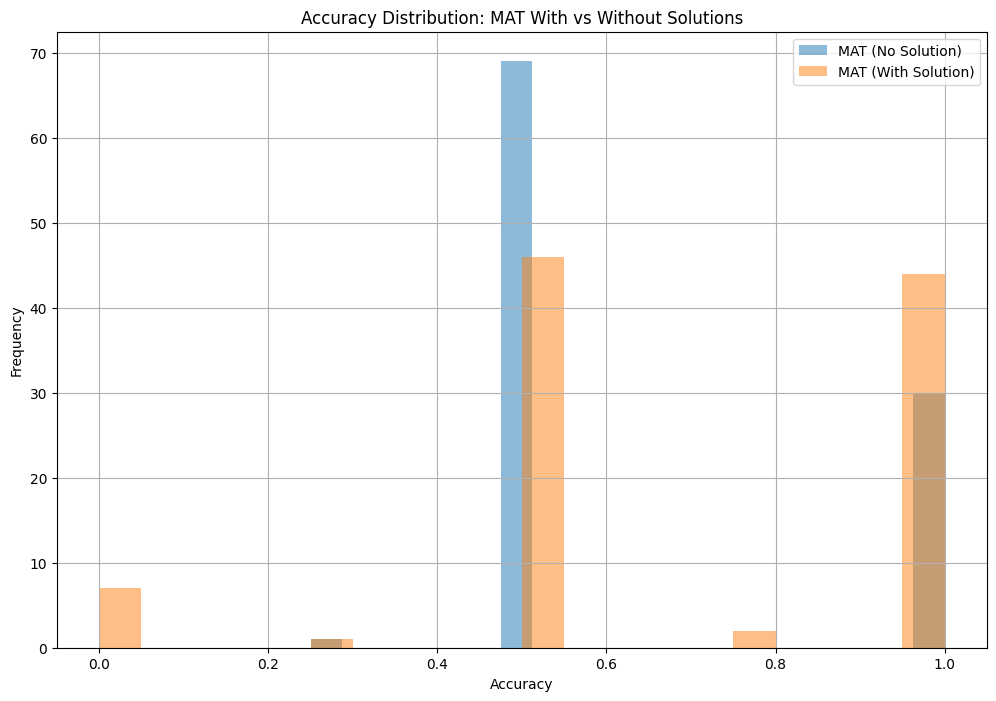

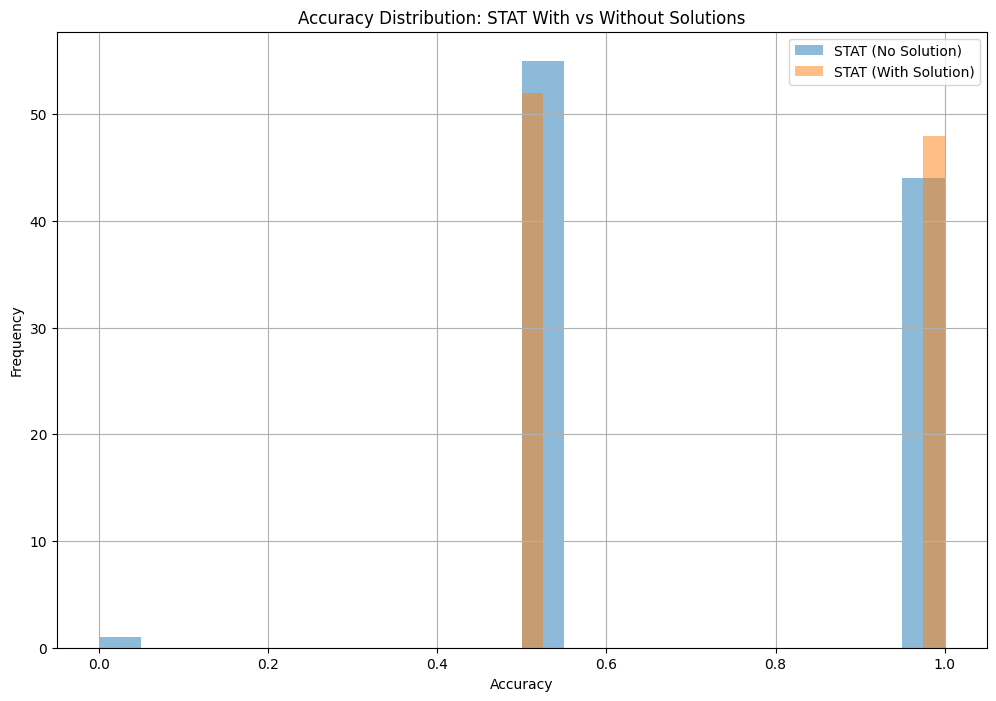

In [7]:
# Detailed analysis for MAT and STAT datasets (with and without solutions)
mat_comparison = pd.concat([
    mat_evaluation.assign(solution_type="With Solution"),
    mat_evaluation_no_solution.assign(solution_type="No Solution")
])

stat_comparison = pd.concat([
    stat_evaluation.assign(solution_type="With Solution"),
    stat_evaluation_no_solution.assign(solution_type="No Solution")
])

# Plot Accuracy Distribution for MAT datasets
plt.figure(figsize=(12, 8))
for solution_type, group in mat_comparison.groupby("solution_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"MAT ({solution_type})")
plt.title("Accuracy Distribution: MAT With vs Without Solutions")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Distribution for STAT datasets
plt.figure(figsize=(12, 8))
for solution_type, group in stat_comparison.groupby("solution_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"STAT ({solution_type})")
plt.title("Accuracy Distribution: STAT With vs Without Solutions")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()



                           Dataset  Average Accuracy  Max Accuracy  \
0                   MAT Evaluation              0.69           1.0   
1                  STAT Evaluation              0.74           1.0   
2                  Bank Evaluation              0.72           1.0   
3     MAT Evaluation (No Solution)              0.65           1.0   
4    STAT Evaluation (No Solution)              0.72           1.0   
5    Bank Evaluation (No Solution)              0.69           1.0   
6          MAT Evaluation (Voting)              0.69           1.0   
7         STAT Evaluation (Voting)              0.76           1.0   
8         Bank Evaluation (Voting)              0.72           1.0   
9    MAT Evaluation (Voting + CoT)              0.69           1.0   
10  STAT Evaluation (Voting + CoT)              0.74           1.0   
11  Bank Evaluation (Voting + CoT)              0.69           1.0   
12       MAT Evaluation (Few Shot)              0.62           1.0   
13      STAT Evaluat

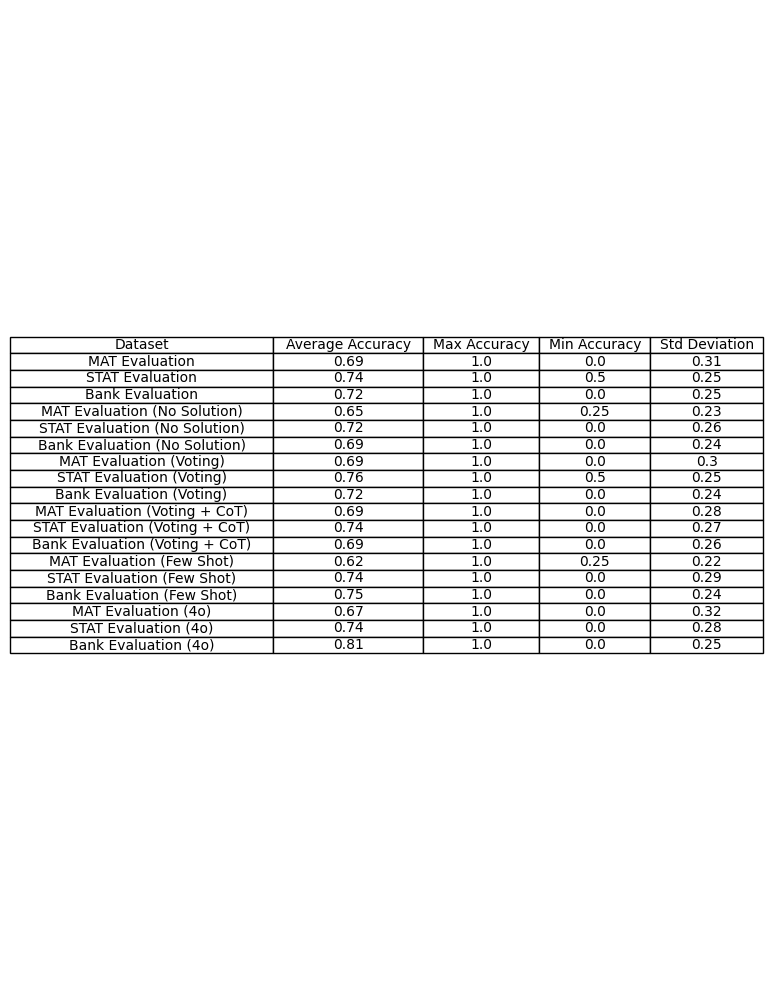

Table saved as PNG: accuracy_insights_table.png


In [8]:
# Save insights to a CSV
insights = []
for dataset_name, df in all_data.items():
    avg_accuracy = df["accuracy"].mean()
    max_accuracy = df["accuracy"].max()
    min_accuracy = df["accuracy"].min()
    std_accuracy = df["accuracy"].std()
    insights.append({
        "Dataset": dataset_name,
        "Average Accuracy": avg_accuracy,
        "Max Accuracy": max_accuracy,
        "Min Accuracy": min_accuracy,
        "Std Deviation": std_accuracy
    })
    
insights_rounded = []
for dataset_name, df in all_data.items():
    avg_accuracy = df["accuracy"].mean()
    max_accuracy = df["accuracy"].max()
    min_accuracy = df["accuracy"].min()
    std_accuracy = df["accuracy"].std()
    insights_rounded.append({
        "Dataset": dataset_name,
        "Average Accuracy": round(avg_accuracy, 2),
        "Max Accuracy": round(max_accuracy, 2),
        "Min Accuracy": round(min_accuracy, 2),
        "Std Deviation": round(std_accuracy, 2)
    })

# Create DataFrame
insights_df = pd.DataFrame(insights_rounded)
# Create DataFrame
insights_df_raw = pd.DataFrame(insights)

# Save to CSV
csv_path = "accuracy_insights.csv"
insights_df_raw.to_csv(csv_path, index=False)

# Generate a pyplot table
fig, ax = plt.subplots(figsize=(6, len(insights_df) * 0.7))  # Adjust figure size based on the number of rows
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(
    cellText=insights_df.values,
    colLabels=insights_df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust font size and layout
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(insights_df.columns))))

# Save the table as a PNG image
png_path = "accuracy_insights_table.png"
plt.savefig(png_path, bbox_inches='tight', dpi=300)

print(insights_df)

plt.show()

print(f"Table saved as PNG: {png_path}")

In [9]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

def gwet_ac1(ratings1, ratings2):
    """
    Calculate Gwet's AC1 statistic.
    Args:
        ratings1, ratings2: Arrays of ratings from two raters
    Returns:
        Gwet's AC1 value
    """
    n = len(ratings1)
    categories = np.unique(np.concatenate([ratings1, ratings2]))
    n_categories = len(categories)
    
    # Calculate observed agreement
    po = np.mean(ratings1 == ratings2)
    
    # Calculate chance agreement
    # Get the probability of each category
    pk = np.zeros(n_categories)
    for i, cat in enumerate(categories):
        pk[i] = (np.sum(ratings1 == cat) + np.sum(ratings2 == cat)) / (2 * n)
    
    # Calculate pe(γ)
    pe_gamma = sum(pk * (1 - pk)) / (n_categories - 1)
    
    # Calculate AC1
    ac1 = (po - pe_gamma) / (1 - pe_gamma)
    return ac1

def calculate_metrics(dataframe, dataset_name):
    """
    Calculate QWK, Cohen's Kappa, and Gwet's AC1 for a dataset.
    Args:
        dataframe: Input DataFrame containing 'human_points' and 'gpt_points'.
        dataset_name: Name of the dataset (for logging).
    Returns:
        A dictionary with calculated metrics.
    """
    metrics = {}

    # Extract relevant columns
    human_points = dataframe['human_points']
    gpt_points = dataframe['gpt_points']

    # Ensure no missing data
    valid_rows = human_points.notna() & gpt_points.notna()

    # Validate 0.5 step conformity
    human_valid = ((human_points * 2) % 1 == 0)
    gpt_valid = ((gpt_points * 2) % 1 == 0)
    conformity_valid = valid_rows & human_valid & gpt_valid

    # Filter valid rows
    human_points = human_points[conformity_valid] * 2  # Scale to integer steps
    gpt_points = gpt_points[conformity_valid] * 2  # Scale to integer steps

    # Convert to integers
    human_points = human_points.astype(int)
    gpt_points = gpt_points.astype(int)

    # Calculate QWK
    metrics['QWK'] = cohen_kappa_score(human_points, gpt_points, weights='quadratic')

    # Calculate Cohen's Kappa
    metrics['Cohen'] = cohen_kappa_score(human_points, gpt_points)

    # Calculate Gwet's AC1
    metrics['AC1'] = gwet_ac1(human_points, gpt_points)

    # Validate metric values
    for metric_name in ['QWK', 'Cohen', 'AC1']:
        if metrics[metric_name] < -1 or metrics[metric_name] > 1:
            print(f"[{dataset_name}] Warning: {metric_name} value {metrics[metric_name]} is out of expected range [-1, 1].")

    return metrics

In [10]:
# Calculate metrics for all datasets
results = {}
for dataset_name, df in all_data.items():
    metrics = calculate_metrics(df, dataset_name)
    results[dataset_name] = metrics

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Save results to CSV
results_df.to_csv("metrics_results.csv", index=False)

# Display results
print("Metrics Results:")
print(results_df)

Metrics Results:
                           Dataset       QWK     Cohen       AC1
0                   MAT Evaluation  0.199735  0.093411  0.343388
1                  STAT Evaluation  0.483307  0.231905  0.248446
2                  Bank Evaluation  0.455071  0.198575  0.293835
3     MAT Evaluation (No Solution)  0.132047  0.021116  0.174419
4    STAT Evaluation (No Solution)  0.337079  0.193200  0.202308
5    Bank Evaluation (No Solution)  0.349516  0.134163  0.237468
6          MAT Evaluation (Voting)  0.216745  0.082268  0.344914
7         STAT Evaluation (Voting)  0.514851  0.272673  0.291882
8         Bank Evaluation (Voting)  0.460529  0.181376  0.282988
9    MAT Evaluation (Voting + CoT)  0.203103  0.055395  0.309144
10  STAT Evaluation (Voting + CoT)  0.425407  0.276539  0.296154
11  Bank Evaluation (Voting + CoT)  0.472705  0.148666  0.233022
12       MAT Evaluation (Few Shot)  0.117860  0.007805  0.112518
13      STAT Evaluation (Few Shot)  0.522293  0.285927  0.291748
14      

In [11]:
def calculate_bias_metrics(dataframe, dataset_name):
    """
    Calculate overestimation and underestimation bias for a dataset.
    Args:
        dataframe: Input DataFrame containing 'human_points' and 'gpt_points'.
        dataset_name: Name of the dataset (for logging).
    Returns:
        A dictionary with bias metrics.
    """
    bias_metrics = {}

    # Extract relevant columns
    human_points = dataframe['human_points']
    gpt_points = dataframe['gpt_points']

    # Ensure no missing data
    valid_rows = human_points.notna() & gpt_points.notna()

    # Validate 0.5 step conformity
    human_valid = ((human_points * 2) % 1 == 0)
    gpt_valid = ((gpt_points * 2) % 1 == 0)
    conformity_valid = valid_rows & human_valid & gpt_valid

    # Log removed data points
    invalid_count = (~conformity_valid).sum()
    if invalid_count > 0:
        print(f"[{dataset_name}] Invalid rows removed due to non-conformance to 0.5 steps: {invalid_count}")

    # Filter valid rows
    human_points = human_points[conformity_valid]
    gpt_points = gpt_points[conformity_valid]

    # Calculate overestimation and underestimation bias
    total_tasks = len(human_points)
    over_bias = sum(max(0, gpt - human) for gpt, human in zip(gpt_points, human_points)) / total_tasks if total_tasks > 0 else 0
    under_bias = sum(max(0, human - gpt) for gpt, human in zip(gpt_points, human_points)) / total_tasks if total_tasks > 0 else 0

    bias_metrics['Overestimation'] = over_bias
    bias_metrics['Underestimation'] = under_bias
    bias_metrics['Invalid Rows Removed'] = invalid_count

    return bias_metrics

def calculate_bias_for_all_datasets(all_data):
    """
    Calculate bias metrics for all datasets.

    Args:
        all_data: Dictionary of datasets, where keys are dataset names and values are DataFrames.

    Returns:
        DataFrame containing bias metrics for all datasets.
    """
    bias_results = {}

    for dataset_name, df in all_data.items():
        bias_results[dataset_name] = calculate_bias_metrics(df, dataset_name)

    # Convert results to DataFrame
    bias_df = pd.DataFrame.from_dict(bias_results, orient="index").reset_index()
    bias_df.rename(columns={"index": "Dataset"}, inplace=True)
    return bias_df

# Example usage with all_data (replace with your actual datasets)
# all_data should be a dictionary where each key is a dataset name, and each value is a DataFrame
bias_results_df = calculate_bias_for_all_datasets(all_data)

# Save results to CSV
bias_results_df.to_csv("bias_results.csv", index=False)

# Display results
print("Bias Results:")
print(bias_results_df)


[Bank Evaluation (No Solution)] Invalid rows removed due to non-conformance to 0.5 steps: 3
[Bank Evaluation (4o)] Invalid rows removed due to non-conformance to 0.5 steps: 4
Bias Results:
                           Dataset  Overestimation  Underestimation  \
0                   MAT Evaluation        0.145000         0.240000   
1                  STAT Evaluation        0.110000         0.150000   
2                  Bank Evaluation        0.235000         0.265000   
3     MAT Evaluation (No Solution)        0.135000         0.290000   
4    STAT Evaluation (No Solution)        0.125000         0.160000   
5    Bank Evaluation (No Solution)        0.314433         0.252577   
6          MAT Evaluation (Voting)        0.135000         0.245000   
7         STAT Evaluation (Voting)        0.105000         0.140000   
8         Bank Evaluation (Voting)        0.250000         0.255000   
9    MAT Evaluation (Voting + CoT)        0.140000         0.245000   
10  STAT Evaluation (Voting + 

### Individual Exercises


In [12]:



def get_exercise_ids_for_each_set(all_data):
    """
    Extract unique exercise IDs for each set from the corresponding datasets.

    Args:
    - all_data (dict): Dictionary of datasets where keys are dataset names, and values are DataFrames.

    Returns:
    - A dictionary mapping each set (e.g., MAT, STAT, BANK) to its unique exercise IDs.
    """
    exercise_ids = {"MAT": set(), "STAT": set(), "BANK": set()}
    for set_name, df in all_data.items():
        # Determine the set type (MAT, STAT, BANK) from the dataset name
        set_type = "MAT" if "MAT" in set_name else "STAT" if "STAT" in set_name else "BANK"

        # Extract exercise IDs
        df["exercise_id"] = df["submission"].apply(lambda x: eval(x)["task_id"] if pd.notna(x) else None)
        exercise_ids[set_type].update(df["exercise_id"].dropna().unique())

    return exercise_ids

def analyze_exercises_by_set(all_data, exercise_ids):
    

    results = {"MAT": [], "STAT": [], "BANK": []}

    for set_name, df in all_data.items():
        print(f"Processing dataset: {set_name}")

        # Determine the set type (MAT, STAT, BANK)
        set_type = "MAT" if "MAT" in set_name else "STAT" if "STAT" in set_name else "BANK"

        # Extract and validate exercise IDs
        df["exercise_id"] = df["submission"].apply(lambda x: eval(x)["task_id"] if pd.notna(x) else None)
        print(f"{set_name}: Unique exercise IDs extracted: {df['exercise_id'].dropna().unique()}")

        # Filter dataset for relevant exercise IDs
        relevant_ids = exercise_ids[set_type]
        df = df[df["exercise_id"].notna()]
        df = df[df["exercise_id"].isin(relevant_ids)]
        print(f"{set_name}: Filtered DataFrame contains {len(df)} rows.")

        # Validate accuracy column
        try:
            df["accuracy"] = df["accuracy"].astype(float)
        except ValueError:
            print(f"[{set_name}] Error converting 'accuracy' to float.")
            continue

        # Group by exercise and calculate metrics
        grouped = df.groupby("exercise_id")["accuracy"].agg(["mean", "std", "count"]).reset_index()
        print(f"{set_name}: Grouping includes {grouped['exercise_id'].nunique()} unique exercises.")

        grouped["set_name"] = set_name  # Add set name for context
        results[set_type].append(grouped)

    # Combine results for each set
    for set_type in results:
        results[set_type] = pd.concat(results[set_type], ignore_index=True) if results[set_type] else pd.DataFrame()

    return results


# Extract unique exercise IDs for each set
exercise_ids = get_exercise_ids_for_each_set(all_data)

# Analyze exercises by set
exercise_analysis_results = analyze_exercises_by_set(all_data, exercise_ids)

# Save and display results for each set
for set_type, result_df in exercise_analysis_results.items():
    if not result_df.empty:
        result_df.to_csv(f"{set_type.lower()}_exercise_analysis_summary.csv", index=False)
        print(f"{set_type} Exercise Analysis Summary:")
        print(result_df.head())
    else:
        print(f"No valid data for {set_type} set.")


Processing dataset: MAT Evaluation
MAT Evaluation: Unique exercise IDs extracted: [661 702 560 764 763 758 860 503 660 757]
MAT Evaluation: Filtered DataFrame contains 100 rows.
MAT Evaluation: Grouping includes 10 unique exercises.
Processing dataset: STAT Evaluation
STAT Evaluation: Unique exercise IDs extracted: [712 766 772 754 613 809 707 855 609 610]
STAT Evaluation: Filtered DataFrame contains 100 rows.
STAT Evaluation: Grouping includes 10 unique exercises.
Processing dataset: Bank Evaluation
Bank Evaluation: Unique exercise IDs extracted: ['banking_12_11' 'banking_9_8' 'banking_11_10' 'banking_16_15'
 'banking_15_14' 'banking_7_6' 'banking_17_16' 'banking_18_17'
 'banking_13_12' 'banking_14_13']
Bank Evaluation: Filtered DataFrame contains 100 rows.
Bank Evaluation: Grouping includes 10 unique exercises.
Processing dataset: MAT Evaluation (No Solution)
MAT Evaluation (No Solution): Unique exercise IDs extracted: [757 763 660 702 560 764 661 758 860 503]
MAT Evaluation (No Solu

In [13]:
def save_exercise_analysis(exercise_analysis_results):
    """
    Save exercise analysis results with strategies as columns without mapping.

    Args:
    - exercise_analysis_results (dict): Dictionary containing exercise analysis DataFrames for each set.
    """

    for set_type, result_df in exercise_analysis_results.items():
        print(set_type, result_df)
        if not result_df.empty:
            # Pivot the DataFrame to get strategies as columns
            pivot_df = result_df.pivot(
                index="exercise_id", columns="set_name", values="mean"
            )

            # Save to CSV
            output_file = f"{set_type.lower()}_exercise_analysis_strategies.csv"
            pivot_df.to_csv(output_file, index=True)

            print(f"Saved {set_type} exercise analysis to {output_file}")
        else:
            print(f"No valid data for {set_type} set.")

# Call the function with exercise_analysis_results
save_exercise_analysis(exercise_analysis_results)


MAT     exercise_id   mean       std  count                       set_name
0           503  0.650  0.241523     10                 MAT Evaluation
1           560  0.550  0.158114     10                 MAT Evaluation
2           660  0.700  0.258199     10                 MAT Evaluation
3           661  0.550  0.158114     10                 MAT Evaluation
4           702  0.900  0.210819     10                 MAT Evaluation
5           757  0.800  0.349603     10                 MAT Evaluation
6           758  0.950  0.158114     10                 MAT Evaluation
7           763  0.625  0.242956     10                 MAT Evaluation
8           764  0.800  0.349603     10                 MAT Evaluation
9           860  0.350  0.411636     10                 MAT Evaluation
10          503  0.650  0.241523     10   MAT Evaluation (No Solution)
11          560  0.550  0.158114     10   MAT Evaluation (No Solution)
12          660  0.550  0.158114     10   MAT Evaluation (No Solution)
13